In [1]:
import sys
sys.path.insert(0, "../../../")

In [2]:
import deeplay as dl
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torchvision
import lightning as L

In [3]:
# Load the MNIST dataset and normalize it to [-1, 1]

mnist = torchvision.datasets.MNIST(
    root="../../data", train=True, download=True, transform=torchvision.transforms.ToTensor()
)

mnist_test = torchvision.datasets.MNIST(
    root="../../data", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

In [4]:
mnist_dataloader = torch.utils.data.DataLoader(mnist, batch_size=32, num_workers=4)
mnist_test_dataloader = torch.utils.data.DataLoader(mnist_test, batch_size=32, num_workers=4)

In [10]:
gan  = dl.VanillaGAN.from_config(
    dl.Config()
    .hidden_dim(10)
    .discriminator.backbone.depth(3)
    .discriminator.backbone.blocks.populate("layer.out_channels", [64, 128, 256])
    .generator.backbone.generator.depth(3)
    .generator.backbone.blocks.layer(kernel_size=3, padding=1)
    .generator.head.output.activation(nn.Identity)
)
gan.discriminator(torch.randn(1, 1, 28, 28))
gan()
gan

VanillaGAN(
  (hidden_dim): 10
  (generator): Template(
    (backbone): SpatialBroadcastDecoder2d(
      (depth): 4
      (output_size): torch.Size([28, 28])
      (input): Identity()
      (encoding): PositionalEncodingLinear2d()
      (blocks): ModuleList(
        (0): Template(
          (layer): Conv2d(12, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): ReLU()
        )
        (1): Template(
          (layer): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): ReLU()
        )
        (2): Template(
          (layer): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): ReLU()
        )
        (3): Template(
          (layer): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (activation): ReLU()
        )
      )
    )
    (head): ImageRegressionHead(
      (num_outputs): 1
      (output): Template(
        (layer): Conv2d(128, 1, kernel_siz

In [3]:
def func(a, /, b, c):
    return a + b + c

args = [1, 2, 3]
kwargs = {}
func(*args, **kwargs)

6

In [11]:

trainer = L.Trainer(max_epochs=10, accelerator="cuda")
trainer.fit(gan, mnist_dataloader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\GU\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\trainer\configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name               | Type            | Params
-------------------------------------------------------
0 | generator          | Template        | 456 K 
1 | discriminator      | ImageClassifier | 371 K 
2 | discriminator_loss | MSELoss         | 0     
3 | generator_loss     | MSELoss         | 0     
-------------------------------------------------------
828 K     Trainable params
0         Non-trainable params
828 K     Total params
3.315     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


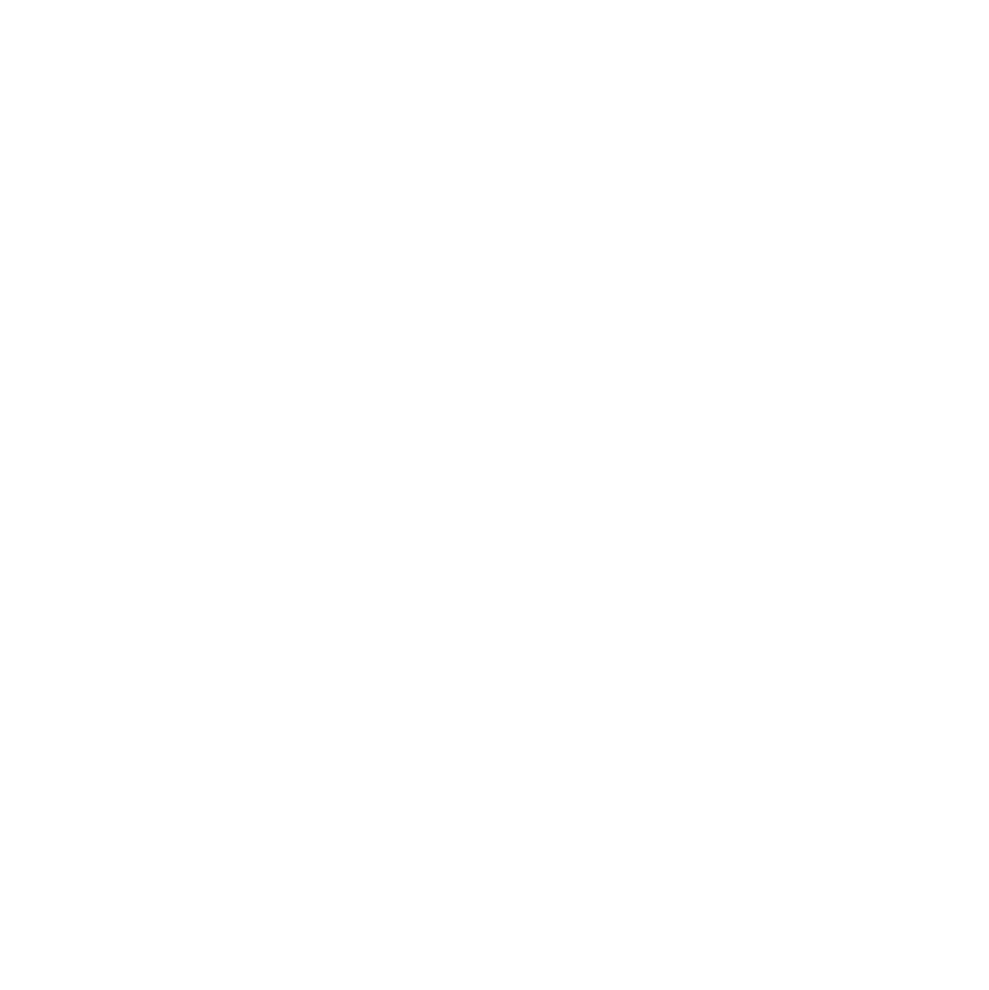

In [9]:

# plot a grid of generated images
import matplotlib.pyplot as plt
import numpy as np

n = 10
plt.figure(figsize=(10, 10))
for i in range(n ** 2):
    plt.subplot(n, n, i + 1)
    plt.imshow(gan()[0].detach().cpu().numpy().transpose((1, 2, 0)), cmap="Greys", vmin=0, vmax=1)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
emb = gan.generator.backbone.encoding.encoding(torch.randn(1, 1, 28, 28))

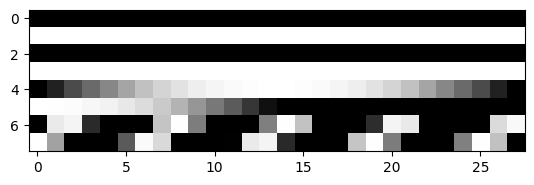

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(emb[0, :, 0, :].detach().cpu().numpy(), cmap="Greys_r", vmin=0, vmax=1)